<a href="https://colab.research.google.com/github/sfansaria/Machine-Learning/blob/main/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Predicted values [ 38921.23 124663.02  64254.03]
Real values      [ 37731. 122391.  57081.]
Trained W        9743.39
Trained b        24306.15


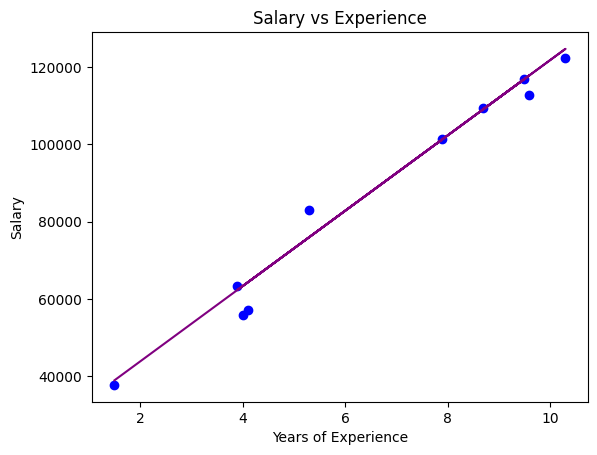

In [2]:
#Import libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Ridge Regression

class RidgeRegression():
   def __init__(self,learning_rate, iterations, l2_penalty):

       self.learning_rate = learning_rate
       self.iterations = iterations
       self.l2_penalty = l2_penalty

   def fit(self, X, Y):

       #no_of_training_examples, no_of_features

       self.m, self.n = X.shape

       #weight initialization
       self.W = np.zeros(self.n)

       self.b = 0
       self.X = X
       self.Y = Y

       #gradient descent learning
       for i in range(self.iterations):
           self.update_weights()

       return self

   def update_weights(self):
       Y_pred = self.predict(self.X)

       #calculate gradients
       dW = (-(2*(self.X.T).dot(self.Y-Y_pred)) + (2*self.l2_penalty*self.W))/self.m
       db = -1 * np.sum(self.Y - Y_pred) / self.m

       #update weights
       self.W = self.W - self.learning_rate*dW
       self.b = self.b - self.learning_rate*db

       return self
   #Hypothetical function h(x)
   def predict(self,X):
       return X.dot(self.W) + self.b

#DRiver code

def main():
  #import the dataset
  df = pd.read_csv('/content/drive/My Drive/ml_datasets/salary_data.csv')
  X = df.iloc[:, :-1].values
  Y = df.iloc[:, 1].values

  #Splitting dataset into train and test set

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=0)

  #Model training
  model = RidgeRegression(iterations=1000,learning_rate=0.01, l2_penalty=1)

  model.fit(X_train, Y_train)

  #Prediction on test set
  Y_pred = model.predict(X_test)

  print("Predicted values", np.round(Y_pred[:3], 2))
  print("Real values     ", Y_test[:3])
  print("Trained W       ", round(model.W[0], 2))
  print("Trained b       ", round(model.b, 2))

  #Visualization on test set

  plt.scatter(X_test, Y_test, color="blue")
  plt.plot(X_test, Y_pred,color="purple")
  plt.title('Salary vs Experience')
  plt.xlabel('Years of Experience')
  plt.ylabel('Salary')
  plt.show()

if __name__=='__main__':
    main()
